In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "HINDUNILVR.NS"
start = "2018-01-01"
end = "2023-10-30"

In [3]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1367.000000,1367.000000,1340.050049,1344.500000,1221.111694,746852
2018-01-02,1345.000000,1349.800049,1328.550049,1338.599976,1215.753296,695988
2018-01-03,1344.699951,1356.800049,1335.000000,1350.349976,1226.424927,832810
2018-01-04,1350.099976,1356.150024,1341.449951,1352.250000,1228.150757,640189
2018-01-05,1351.000000,1362.949951,1348.250000,1356.550049,1232.056274,568451
...,...,...,...,...,...,...
2023-10-20,2520.000000,2543.550049,2485.050049,2495.149902,2476.983154,3608160
2023-10-23,2494.000000,2509.949951,2480.350098,2483.500000,2465.417969,922707
2023-10-25,2475.050049,2490.000000,2465.000000,2477.300049,2459.263184,1435836


In [4]:
data = df['Close']

scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1151, 288)

In [6]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

In [11]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [12]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [13]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 3097174.325167181
Root Mean Squared Error (RMSE): 3142451.326067906


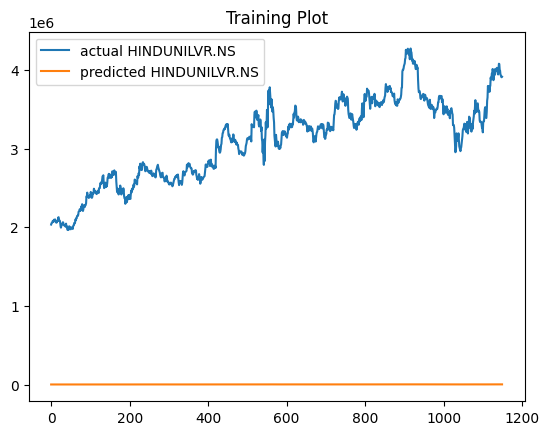

In [14]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 3909917.4263906777
Root Mean Squared Error (RMSE): 3911608.99790353


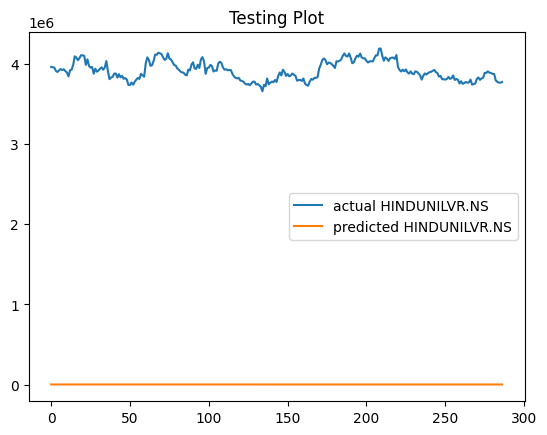

In [15]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [16]:
y_test[-1]

3772271.6074182093

In [17]:
pred[-1]

array([2470.8757], dtype=float32)

In [19]:
future_start="2023-11-01"
future_end="2023-12-09"

future_data = yf.download(ticker, start=future_start, end=future_end)
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,2485.000000,2493.949951,2466.800049,2472.250000,2454.250000,1267131
2023-11-02,2475.000000,2496.000000,2463.300049,2486.800049,2486.800049,1595123
2023-11-03,2497.000000,2512.500000,2485.800049,2509.250000,2509.250000,1125583
2023-11-06,2515.000000,2517.750000,2491.100098,2497.399902,2497.399902,1338677
2023-11-07,2496.000000,2505.199951,2485.250000,2496.449951,2496.449951,1473411
2023-11-08,2498.000000,2525.000000,2497.699951,2519.350098,2519.350098,745022
2023-11-09,2520.050049,2522.000000,2473.050049,2476.699951,2476.699951,1823094
2023-11-10,2477.000000,2488.600098,2465.350098,2486.550049,2486.550049,771062
2023-11-13,2477.199951,2487.199951,2471.000000,2478.149902,2478.149902,760809


In [20]:
future_data = np.array(future_data['Close'])
len(future_data)

26

In [21]:
# model(april1) = (april2-pred) -> april2actual



# model(april2-pred) = april3-pred

In [22]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 44ms/step


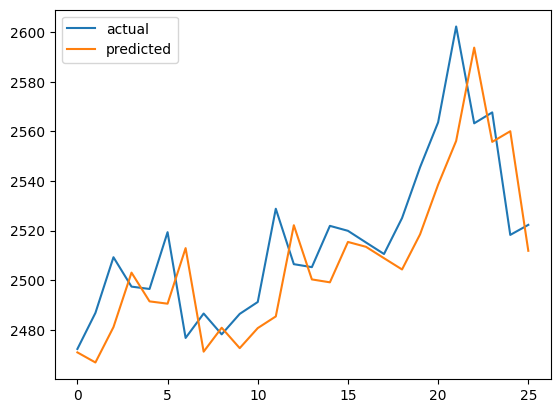

In [23]:
plt.plot(future_data, label = 'actual')
plt.plot(future_predictions, label = 'predicted')
plt.legend()
plt.show()

In [24]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [25]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [26]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

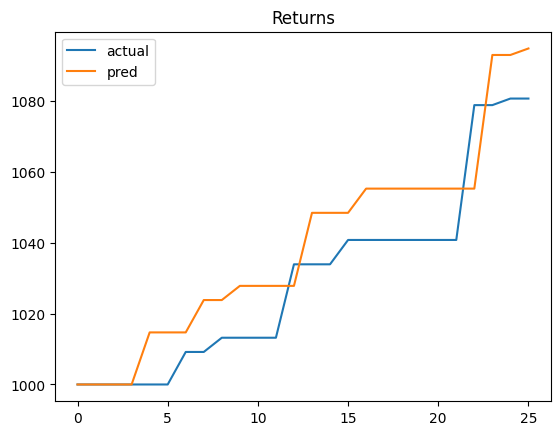

In [27]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()